## Project-1

#### About Dataset 
- The dataset provides the number of monthly sales of champagne from January 1964 to September 1972, or just under 10 years of data.
- The values are a count of millions of sales and there are 105 observations.
- The dataset is credited to Makridakis and Wheelwright, 1989.

The below cell contains all the questions and further down are the answers to those questions.

1) Load the dataset into your python environment. 
2) split the dataset into train (Jan 1964 - sep 1971) and valid (oct 1971 - Sep 1972)
3) Use the stacked line chart (Discussed in the class) to visualize the dataset 
4) Visualize the monthly sales of champagne using box plot (aggreagate using monthly sales)
5) Decompose the model into 
    - Trend
    - Seasonal
    - residual

### Building ARIMA model.
6) Build a SARIMA model using order (5, 1, 1) and seasonal_order = (1, 1, 0, 12) and evaluate the rmse on validation set.
```
Hint: sarimax.SARIMAX(x_train, trend='n', order=(5,1,1), seasonal_order=(1,1,0,12))
```
7) Use an Additive holtswinter method and using seasonal component (12) and evaluate the rmse on validation set.
```
Hint: holtswinter.additive(list(x_train.values), 12, len(x_valid.values))
```

In [1]:
### Load the required libraries
import pandas as pd
import numpy as np
import datetime
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [2]:
def parser(x):
    return pd.datetime.strptime(x, '%Y-%m' )

## 1) Load the dataset into your python environment

In [3]:
data = pd.Series.from_csv("data/perrin-freres-monthly-champagne.csv", header=0)
print(data.shape)
data.name = "Sales"
data = data.apply(lambda x: np.float32(x))
data.head()

(105,)


Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
Name: Sales, dtype: float64

### 2) split the dataset into train (Jan 1964 - Sep 1971) and valid (Sep 1971 - Sep 1972)

In [4]:
x_train = data[data.index <datetime.datetime(1971, 10, 1, 0, 0, 0)]
x_valid = data[data.index >=datetime.datetime(1971, 10, 1, 0, 0, 0)]
print(x_train.shape, x_valid.shape)

(93,) (12,)


## 3) Use the stacked line chart (Discussed in the class) to visualize the dataset

In [5]:
ts = pd.DataFrame(x_train)
ts["year"] = ts.index.to_series().dt.year
ts["month"] = ts.index.to_series().dt.strftime('%b')
ts.head()

,Sales,year,month
Month,,,
1964-01-01,2815.0,1964,Jan
1964-02-01,2672.0,1964,Feb
1964-03-01,2755.0,1964,Mar
1964-04-01,2721.0,1964,Apr
1964-05-01,2946.0,1964,May


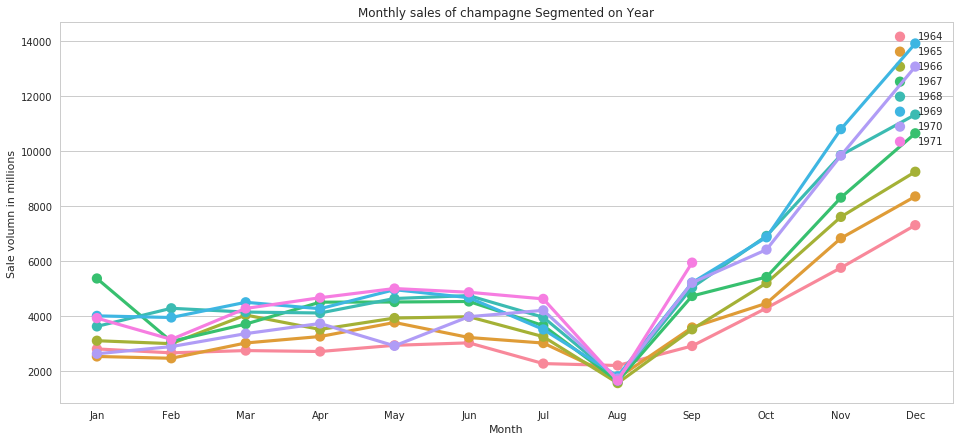

In [6]:
plt.figure(figsize=(16, 7))
sns.pointplot(x="month", y="Sales", hue="year", data=ts, x_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Sale volumn in millions")
plt.title("Monthly sales of champagne Segmented on Year")
plt.legend(loc='upper right')

## 4)Visualize the monthly sales of champagne using box plot (aggreagate using monthly sales)

In [ ]:
# plt.figure(figsize=(16, 7))
# sns.factorplot(x="month", y="Sales", data=ts, kind="box", x_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
#        'Sep', 'Oct', 'Nov', 'Dec'], size=8, aspect=float(16/7))
# plt.xlabel("Month")
# plt.ylabel("Sale volumn in millions")
# plt.title("Monthly sales of champagne aggregated monthly")

## 5) Decompose the time-series

/home/vanapaliprakash/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


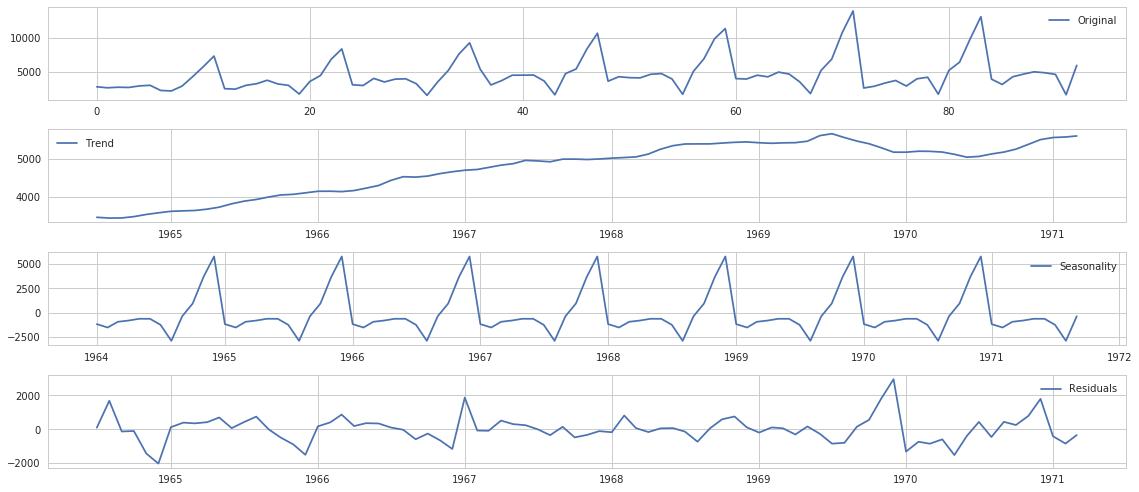

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

#log_train = x_train.apply(lambda x: math.log(x+1))
decomposition = seasonal_decompose(x_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(16, 7))
plt.subplot(411)
plt.plot(x_train.values, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## 6) Build SARIMA model

In [8]:
from statsmodels.tsa.statespace import sarimax
mod = sarimax.SARIMAX(x_train,  order=(5,1,1), seasonal_order=(1,1,0,12))
results = mod.fit(disp=-1)

RMSE: 425.62669487776503


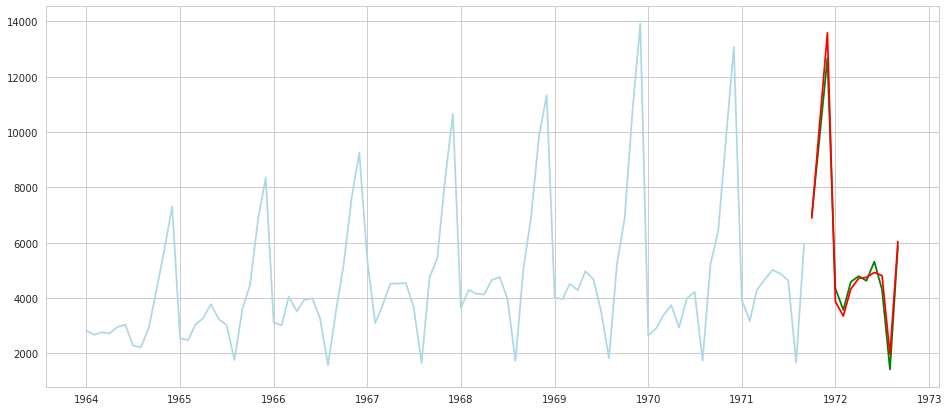

In [13]:

plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_valid.index, x_valid.values, color="green")

## Forecasting 
pred = pd.DataFrame(results.forecast(len(x_valid)))
pred.columns = ["yhat"]
pred.index = x_valid.index

## Converting from log to normal value
#pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_valid.values, pred.values), 0.5)
print("RMSE:",measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

In [10]:
import holtswinter
pred , alpha, beta, gamma, rmse =holtswinter.additive(list(x_train.values), 12, len(x_valid.values))
print(len(pred), alpha, beta, rmse)

12 0.0734023444982 0.0 712.4475543433381


RMSE: 517.3277843129704


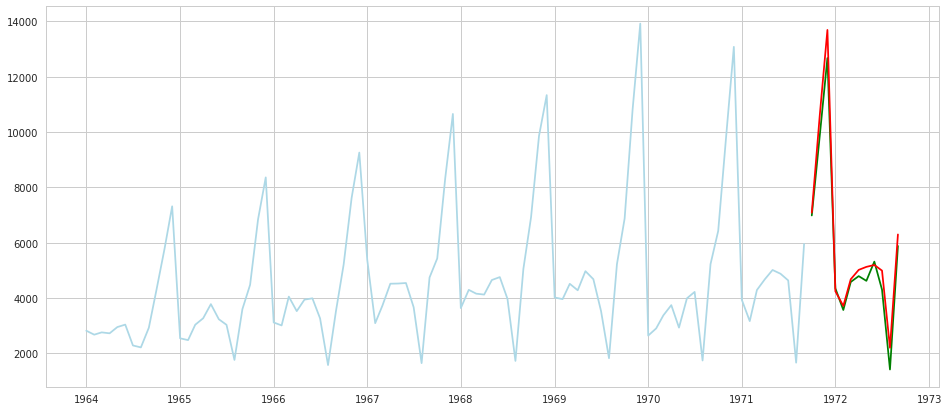

In [12]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_valid.index, x_valid.values, color="green")
pred = pd.DataFrame(pred)
pred.columns = ["yhat"]
pred.index = x_valid.index
measure = math.pow(mean_squared_error(x_valid.values, pred.values), 0.5)
print("RMSE:", measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()